## __Data Science Challenge__

__Load Data__

In [235]:
#importing packages
import numpy as np
import pandas as pd
import sklearn
import os
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection, preprocessing, metrics
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingClassifier, VotingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score,confusion_matrix 
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
#import xgboost as xgb
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
path = 'C:/Users/rithesh/Desktop/NYC_taxi/'
g_df=pd.read_csv(path+'green_tripdata_2015-09.csv')

In [236]:
print(g_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494926 entries, 0 to 1494925
Data columns (total 21 columns):
VendorID                 1494926 non-null int64
lpep_pickup_datetime     1494926 non-null object
Lpep_dropoff_datetime    1494926 non-null object
Store_and_fwd_flag       1494926 non-null object
RateCodeID               1494926 non-null int64
Pickup_longitude         1494926 non-null float64
Pickup_latitude          1494926 non-null float64
Dropoff_longitude        1494926 non-null float64
Dropoff_latitude         1494926 non-null float64
Passenger_count          1494926 non-null int64
Trip_distance            1494926 non-null float64
Fare_amount              1494926 non-null float64
Extra                    1494926 non-null float64
MTA_tax                  1494926 non-null float64
Tip_amount               1494926 non-null float64
Tolls_amount             1494926 non-null float64
Ehail_fee                0 non-null float64
improvement_surcharge    1494926 non-null float64
To

<font size=3 color=red >__Question 1: Report how many rows and columns of data you have loaded__</font>

In [237]:
print("Loaded:", g_df.shape[1],"columns and",g_df.shape[0],"rows of data")

Loaded: 21 columns and 1494926 rows of data


__Exploratory Data Analysis__

In [238]:
g_df.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


In [239]:
g_df.describe()

,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
count,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,0.0,1.494926e+06,1.494926e+06,1.494926e+06,1.494922e+06
mean,1.782045e+00,1.097653e+00,-7.383084e+01,4.069114e+01,-7.383728e+01,4.069291e+01,1.370598e+00,2.968141e+00,1.254320e+01,3.512800e-01,4.866408e-01,1.235727e+00,1.231047e-01,NaN,2.920991e-01,1.503215e+01,1.540559e+00,1.022353e+00
std,4.128570e-01,6.359437e-01,2.776082e+00,1.530882e+00,2.677911e+00,1.476698e+00,1.039426e+00,3.076621e+00,1.008278e+01,3.663096e-01,8.504473e-02,2.431476e+00,8.910137e-01,NaN,5.074009e-02,1.155316e+01,5.232935e-01,1.478288e-01
min,1.000000e+00,1.000000e+00,-8.331908e+01,0.000000e+00,-8.342784e+01,0.000000e+00,0.000000e+00,0.000000e+00,-4.750000e+02,-1.000000e+00,-5.000000e-01,-5.000000e+01,-1.529000e+01,NaN,-3.000000e-01,-4.750000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,-7.395961e+01,4.069895e+01,-7.396782e+01,4.069878e+01,1.000000e+00,1.100000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,8.160000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,-7.394536e+01,4.074674e+01,-7.394504e+01,4.074728e+01,1.000000e+00,1.980000e+00,9.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,1.176000e+01,2.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,-7.391748e+01,4.080255e+01,-7.391013e+01,4.079015e+01,1.000000e+00,3.740000e+00,1.550000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,NaN,3.000000e-01,1.830000e+01,2.000000e+00,1.000000e+00
max,2.000000e+00,9.900000e+01,0.000000e+00,4.317726e+01,0.000000e+00,4.279934e+01,9.000000e+00,6.031000e+02,5.805000e+02,1.200000e+01,5.000000e-01,3.000000e+02,9.575000e+01,NaN,3.000000e-01,5.813000e+02,5.000000e+00,2.000000e+00


In [240]:
missing_data = pd.DataFrame({'total_missing': g_df.isnull().sum(), 'perc_missing': (g_df.isnull().mean())})
missing_data

,perc_missing,total_missing
VendorID,0.000000,0
lpep_pickup_datetime,0.000000,0
Lpep_dropoff_datetime,0.000000,0
Store_and_fwd_flag,0.000000,0
RateCodeID,0.000000,0
Pickup_longitude,0.000000,0
Pickup_latitude,0.000000,0
Dropoff_longitude,0.000000,0
Dropoff_latitude,0.000000,0
Passenger_count,0.000000,0


In [241]:
data=g_df

In [252]:
#converting categorical features to numerical
Store_and_fwd_flag1=[]
for index, row in data.iterrows():
    if row['Store_and_fwd_flag']=='N':
        Store_and_fwd_flag1.append(0)
    else:
        Store_and_fwd_flag1.append(1)

data['Store_and_fwd_flag1']=Store_and_fwd_flag1

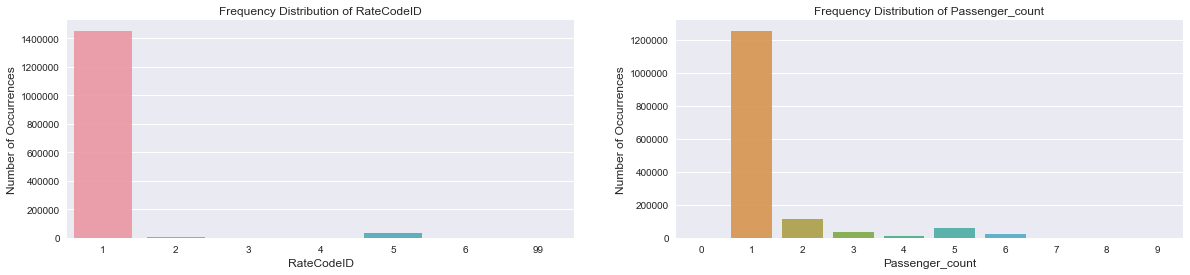

In [249]:
# Exploring feature distribution:
fig,ax = plt.subplots(1,2,figsize = (20,4)) 
ratecodeid_count = data['RateCodeID'].astype('str').value_counts()
sns.set(style="darkgrid")
sns.barplot(ratecodeid_count.index,ratecodeid_count.values, alpha=0.9,ax=ax[0])
ax[0].set_title('Frequency Distribution of RateCodeID')
ax[0].set_ylabel('Number of Occurrences', fontsize=12)
ax[0].set_xlabel('RateCodeID', fontsize=12)

passenger_count = data['Passenger_count'].astype('str').value_counts()
sns.set(style="darkgrid")
sns.barplot(passenger_count.index,passenger_count.values, alpha=0.9,ax=ax[1])
ax[1].set_title('Frequency Distribution of Passenger_count')
ax[1].set_ylabel('Number of Occurrences', fontsize=12)
ax[1].set_xlabel('Passenger_count', fontsize=12)
plt.show()

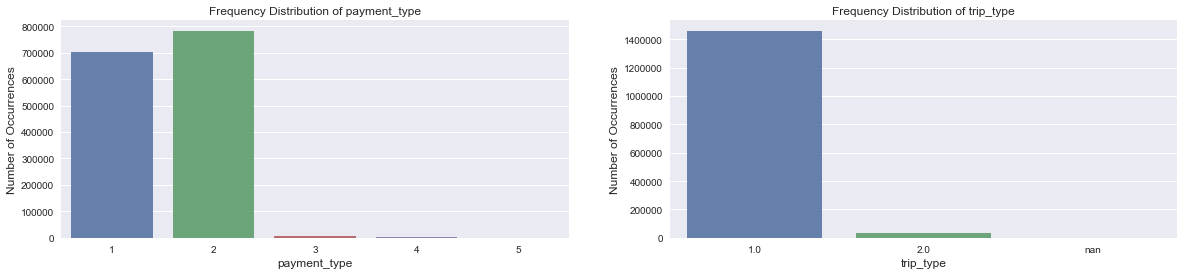

In [250]:
# Exploring feature distribution:
fig,ax = plt.subplots(1,2,figsize = (20,4)) 
payment_type_count = data['Payment_type'].astype('str').value_counts()
sns.set(style="darkgrid")
sns.barplot(payment_type_count.index,payment_type_count.values, alpha=0.9,ax=ax[0])
ax[0].set_title('Frequency Distribution of payment_type')
ax[0].set_ylabel('Number of Occurrences', fontsize=12)
ax[0].set_xlabel('payment_type', fontsize=12)

trip_type_count = data['Trip_type '].astype('str').value_counts()
sns.set(style="darkgrid")
sns.barplot(trip_type_count.index,trip_type_count.values, alpha=0.9,ax=ax[1])
ax[1].set_title('Frequency Distribution of trip_type')
ax[1].set_ylabel('Number of Occurrences', fontsize=12)
ax[1].set_xlabel('trip_type', fontsize=12)
plt.show()

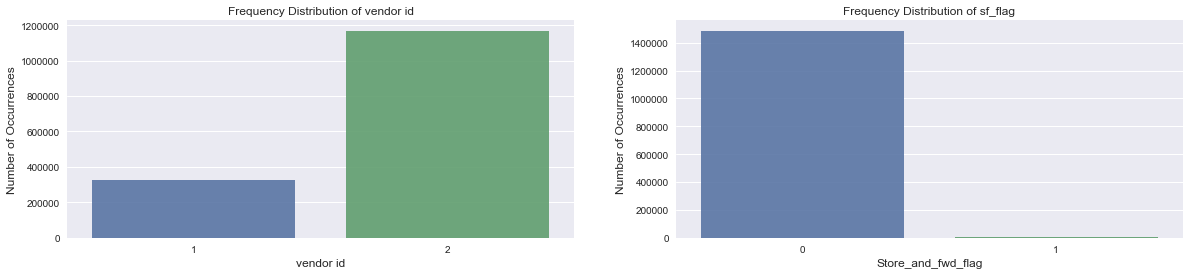

In [253]:
# Exploring feature distribution:
fig,ax = plt.subplots(1,2,figsize = (20,4)) 
vendorid_count = data['VendorID'].astype('str').value_counts()
sns.set(style="darkgrid")
sns.barplot(vendorid_count.index,vendorid_count.values, alpha=0.9,ax=ax[0])
ax[0].set_title('Frequency Distribution of vendor id')
ax[0].set_ylabel('Number of Occurrences', fontsize=12)
ax[0].set_xlabel('vendor id', fontsize=12)

sf_flag_count = data['Store_and_fwd_flag1'].astype('str').value_counts()
sns.set(style="darkgrid")
sns.barplot(sf_flag_count.index,sf_flag_count.values, alpha=0.9,ax=ax[1])
ax[1].set_title('Frequency Distribution of sf_flag')
ax[1].set_ylabel('Number of Occurrences', fontsize=12)
ax[1].set_xlabel('Store_and_fwd_flag', fontsize=12)
plt.show()

 <font color=red size=3 >__Question 2-1: Plot a histogram of the number of the trip distance (“Trip Distance”)__ </font>

Text(0.5,1,'Histogram of the number of trip distance with shorter x range')

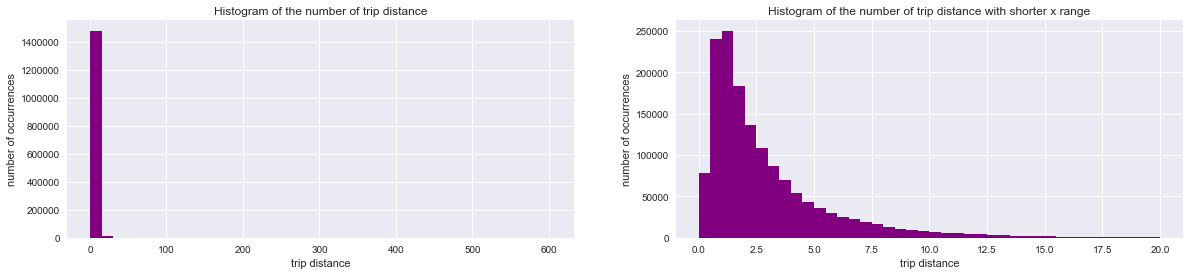

In [254]:
fig,ax = plt.subplots(1,2,figsize = (20,4)) 

data.Trip_distance.hist(bins=40,ax=ax[0],color = "purple")
ax[0].set_xlabel('trip distance')
ax[0].set_ylabel('number of occurrences')
ax[0].set_title('Histogram of the number of trip distance')

data.Trip_distance.hist(bins=40,ax=ax[1],range=[0,20],color = "purple")
ax[1].set_xlabel('trip distance')
ax[1].set_ylabel('number of occurrences')
ax[1].set_title('Histogram of the number of trip distance with shorter x range')

 <font color=red size=3 >__Question 2-2: Report any structure you find and any hypotheses you have about that structure__ </font>

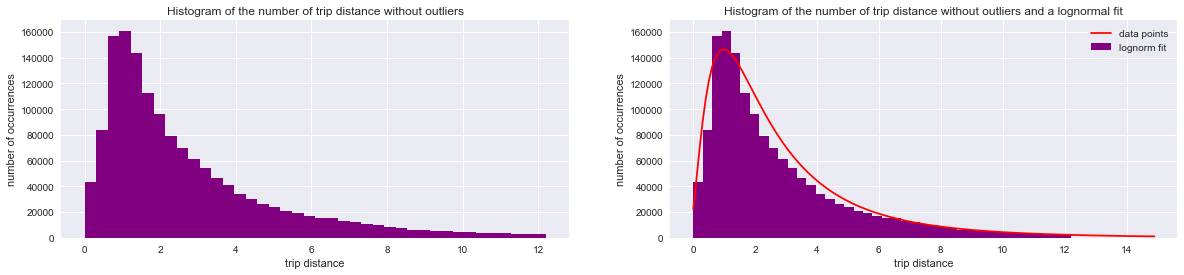

In [255]:
#Ploting after removing outliers:
#removing datapoints farther from mean- 3 * standartd deviation 

fig,ax = plt.subplots(1,2,figsize = (20,4)) 
lt = data.Trip_distance 
lt[~((lt-lt.mean()).abs()>3*lt.std())].hist(bins=40,ax=ax[0],color = "purple") 
ax[0].set_xlabel('trip distance')
ax[0].set_ylabel('number of occurrences')
ax[0].set_title('Histogram of the number of trip distance without outliers')

lt = data.Trip_distance 
lt[~((lt-lt.mean()).abs()>3*lt.std())].hist(bins=40,ax=ax[1],color="purple") 
ax[1].set_xlabel('trip distance')
ax[1].set_ylabel('number of occurrences')
ax[1].set_title('Histogram of the number of trip distance without outliers and a lognormal fit')
scatter,loc,mean = lognorm.fit(data.Trip_distance.values,scale=data.Trip_distance.mean(),loc=0)
pdf_fitted = lognorm.pdf(np.arange(0,15,.1),scatter,loc,mean)
ax[1].plot(np.arange(0,15,.1),500000*pdf_fitted,'r-') 
ax[1].legend(['data points','lognorm fit'])

plt.show()

It is evident from the above, that the figure is right skewed and does not follow guassian distribution, since the trip distance is always positive and a __lognormal distribution__ fits to the dataset. It looks like the trip distance is not random distrubution and the data follows a pattern for example, people tend to take cabs at airports or people usually travel during office hours etc

In [9]:
g_df['Trip_distance'].mean()
g_df.loc[g_df['Trip_distance'] >= 25]

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
1068,1,2015-09-01 00:51:28,2015-09-01 01:32:24,N,1,-73.849983,40.753361,-73.377113,40.722439,1,...,87.5,0.5,0.5,0.00,0.00,NaN,0.3,88.80,2,1.0
3644,2,2015-09-01 05:26:32,2015-09-01 06:29:14,N,5,-73.833244,40.673302,-73.133919,40.798065,2,...,125.0,0.0,0.0,0.00,0.00,NaN,0.0,125.00,2,2.0
4180,2,2015-09-01 06:48:04,2015-09-01 07:19:23,N,3,-73.942932,40.821476,-74.183434,40.688156,1,...,85.5,0.0,0.0,0.00,17.50,NaN,0.3,103.30,2,1.0
4272,2,2015-09-01 06:51:40,2015-09-01 08:03:21,N,1,-73.949898,40.786430,-73.639481,41.031807,1,...,95.5,0.0,0.5,0.00,0.00,NaN,0.3,96.30,2,1.0
7686,1,2015-09-01 08:44:51,2015-09-01 09:35:58,N,2,-73.947983,40.830189,-73.783264,40.643776,1,...,52.0,0.0,0.5,11.65,5.54,NaN,0.3,69.99,1,1.0
9682,2,2015-09-01 09:05:58,2015-09-01 10:22:38,N,4,-73.807510,40.700329,-74.177467,40.695183,1,...,121.0,0.0,0.5,0.00,20.83,NaN,0.3,142.63,2,1.0
11729,2,2015-09-01 10:26:17,2015-09-01 11:24:41,N,1,-73.866440,40.873158,-73.615585,40.698673,1,...,87.5,0.0,0.5,0.00,5.54,NaN,0.3,93.84,2,1.0
11803,2,2015-09-01 10:28:45,2015-09-01 11:44:03,N,1,-73.992561,40.689400,-73.812103,40.587521,1,...,78.0,0.0,0.5,0.00,0.00,NaN,0.3,78.80,2,1.0
13402,2,2015-09-01 11:14:06,2015-09-01 12:12:44,N,1,-73.997147,40.573318,-73.927780,40.821587,1,...,75.0,0.0,0.5,0.00,0.00,NaN,0.3,75.80,2,1.0
13538,2,2015-09-01 11:47:25,2015-09-01 12:30:25,N,1,-73.616959,40.698498,-73.866989,40.873230,1,...,71.0,0.0,0.5,0.00,5.54,NaN,0.3,77.34,2,1.0


In [259]:
#Creating varaibles that capture pickup and drop off date and hour
data['Pickup_date'] = data.lpep_pickup_datetime.apply(lambda x:dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
data['Dropoff_date'] = data.Lpep_dropoff_datetime.apply(lambda x:dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
data['Pickup_hour'] = data.Pickup_date.apply(lambda x:x.hour)
data['Dropoff_hour'] = data.Dropoff_date.apply(lambda x:x.hour)

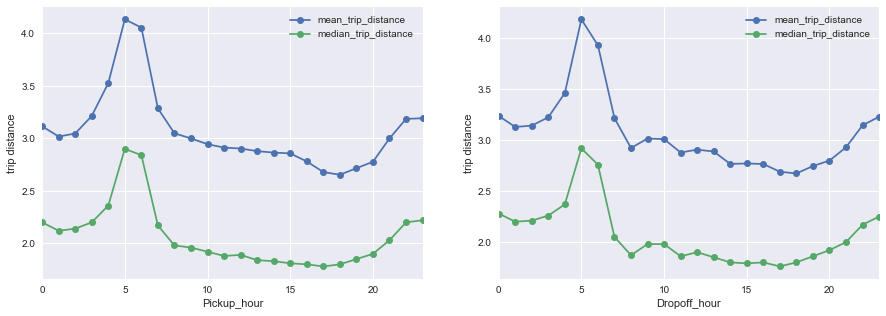

In [260]:
#plot mean and median trip distance by hour of day
fig,ax = plt.subplots(1,2,figsize = (20,4)) 
data['Trip_distance1']=data['Trip_distance']
df1 = data.groupby(["Pickup_hour"], as_index=False).agg({'Trip_distance': 'mean','Trip_distance1': 'median'}).rename(columns = {'Trip_distance':'mean_trip_distance', 'Trip_distance1': 'median_trip_distance'}) 
ax[0] = df1.plot(x='Pickup_hour', y=['mean_trip_distance', 'median_trip_distance'], kind='line', style="-o", figsize=(15,5),ax=ax[0])
ax[0].set_ylabel("trip distance")

df2 = data.groupby(["Dropoff_hour"], as_index=False).agg({'Trip_distance': 'mean','Trip_distance1': 'median'}).rename(columns = {'Trip_distance':'mean_trip_distance', 'Trip_distance1': 'median_trip_distance'})
ax[1] = df2.plot(x='Dropoff_hour', y=['mean_trip_distance', 'median_trip_distance'], kind='line', style="-o", figsize=(15,5),ax=ax[1])
ax[1].set_ylabel("trip distance")

plt.show()

From the above figures we see that people take longer trips during morning hours but surprsingly do not take cabs while they return in the evening, they might be returning back using public transportation

 <font color=red size=3 >__Question 3-1:Report mean and median trip distance grouped by hour of day__</font>

In [12]:
print("********************** Mean and Median Trip distance grouped by hour of the day **********************")
df1

********************** Mean and Median Trip distance grouped by hour of the day **********************


,Pickup_hour,mean_trip_distance,median_trip_distance
0,0,3.115276,2.20
1,1,3.017347,2.12
2,2,3.046176,2.14
3,3,3.212945,2.20
4,4,3.526555,2.36
5,5,4.133474,2.90
6,6,4.055149,2.84
7,7,3.284394,2.17
8,8,3.048450,1.98
9,9,2.999105,1.96


 <font color=red size=3 >__Question 3-2: We’d like to get a rough sense of identifying trips that originate or terminate at one of the NYC area airports. Can you provide a count of how many transactions fit this criteria, the average fare, and any other interesting characteristics of these trips.__</font>

In [13]:
#avg fare, #transactions 
airports_trips = data[(data.RateCodeID==2) | (data.RateCodeID==3)]
print("No. of trips that originate or terminate at one of the NYC area airports are:",airports_trips.shape[0])
print("Avg. fare amount for to and fro airport trips:",airports_trips['Fare_amount'].mean())

No. of trips that originate or terminate at one of the NYC area airports are: 5552
Avg. fare amount for to and fro airport trips: 48.976945244956774


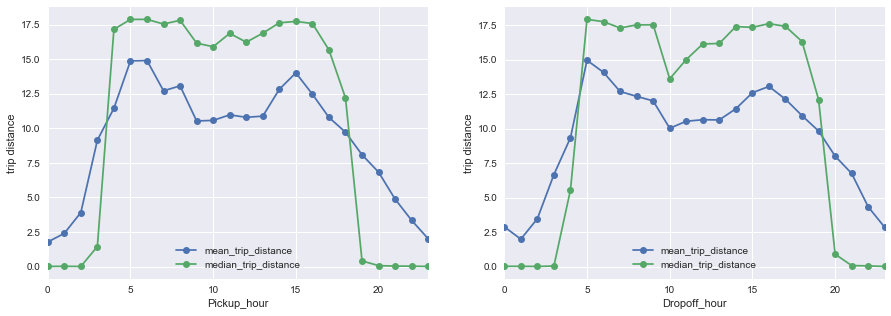

In [261]:
#plotting mean and median trip distancesof airport rides based on hour of day 
fig,ax = plt.subplots(1,2,figsize = (20,4)) 
airports_trips['Trip_distance1']=airports_trips['Trip_distance']
df1 = airports_trips.groupby(["Pickup_hour"], as_index=False).agg({'Trip_distance': 'mean','Trip_distance1': 'median'}).rename(columns = {'Trip_distance':'mean_trip_distance', 'Trip_distance1': 'median_trip_distance'}) 
ax[0] = df1.plot(x='Pickup_hour', y=['mean_trip_distance', 'median_trip_distance'], kind='line', style="-o", figsize=(15,5),ax=ax[0])
ax[0].set_ylabel("trip distance")

df2 = airports_trips.groupby(["Dropoff_hour"], as_index=False).agg({'Trip_distance': 'mean','Trip_distance1': 'median'}).rename(columns = {'Trip_distance':'mean_trip_distance', 'Trip_distance1': 'median_trip_distance'})
ax[1] = df2.plot(x='Dropoff_hour', y=['mean_trip_distance', 'median_trip_distance'], kind='line', style="-o", figsize=(15,5),ax=ax[1])
ax[1].set_ylabel("trip distance")

plt.show()

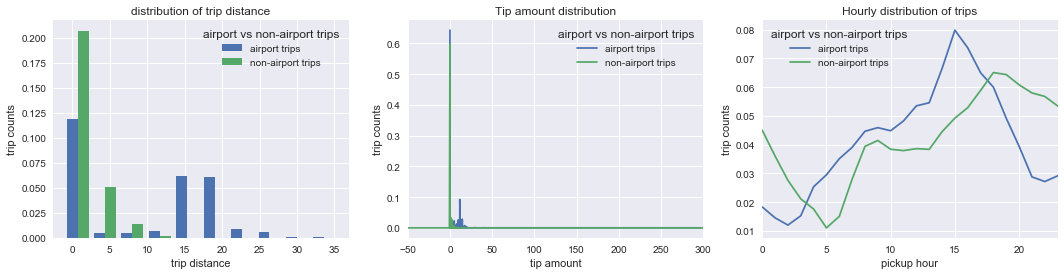

In [267]:
#Defining airport and non-airport trips
lt1 = airports_trips.Trip_distance # airport trips
lt2 = data.loc[~data.index.isin(v2.index),'Trip_distance'] # non-airport trips

#Ploting after removing outliers:
#removing datapoints farther from mean- 3 * standartd deviation 

lt1 = lt1[~((lt1-lt1.mean()).abs()>3*lt1.std())]
lt2 = lt2[~((lt2-lt2.mean()).abs()>3*lt2.std())] 

# trip distance distribution
bins = np.histogram(lt1,normed=True)[1]
hist1 = np.histogram(lt1,bins=bins,normed=True)
hist2 = np.histogram(lt2,bins=bins,normed=True)
fig,ax = plt.subplots(1,3,figsize = (18,4))
wth = .4*(bins[1]-bins[0])
ax[0].bar(bins[:-1],hist1[0],alpha=1,width=wth)
ax[0].bar(bins[:-1]+w,hist2[0],alpha=1,width=wth)
ax[0].legend(['airport trips','non-airport trips'],loc='best',title='airport vs non-airport trips')
ax[0].set_xlabel('trip distance')
ax[0].set_ylabel('trip counts')
ax[0].set_title('distribution of trip distance')

# tip amount distribution
airports_trips.Tip_amount.value_counts(normalize=True).sort_index().plot(ax=ax[1])
data.loc[~data.index.isin(lt1.index),'Tip_amount'].value_counts(normalize=True).sort_index().plot(ax=ax[1])
ax[1].legend(['airport trips','non-airport trips'],loc='best',title='airport vs non-airport trips')
ax[1].set_xlabel('tip amount')
ax[1].set_ylabel('trip counts')
ax[1].set_title('Tip amount distribution')

# hourly distribution
airports_trips.Pickup_hour.value_counts(normalize=True).sort_index().plot(ax=ax[2])
data.loc[~data.index.isin(lt1.index),'Pickup_hour'].value_counts(normalize=True).sort_index().plot(ax=ax[2])
ax[2].legend(['airport trips','non-airport trips'],loc='best',title='airport vs non-airport trips')
ax[2].set_xlabel('pickup hour')
ax[2].set_ylabel('trip counts')
ax[2].set_title('Hourly distribution of trips')

plt.show()

From the above figures we see that<br>
    -  From fig1, usually longer travel distances are airport rides, approx distance >15miles, they might be rides to/from airports <br>
    -  From fig2, airport riders usually pay higher tips compared to non-airpory riders <br>
    -  From fig3, airport trips usually start off 2-3 hours earlier than non-airport trips and have their highest peak at 3PM.

<font color=red size=3 >__Question 4-1: Build a derived variable for tip as a percentage of the total fare__ </font>

In [272]:
data=data.drop(['Trip_distance1'],axis=1)
data=data[data['Total_amount']>0] #lost

#create a new derived feature Tip_perc
data['Tip_perc']=(data['Tip_amount']/data['Total_amount'])*100

print("Tip percentage mean:",data['Tip_perc'].mean())
print("Tip percentage median:",data['Tip_perc'].median())
print("Tip percentage min:",data['Tip_perc'].min())
print("Tip percentage max:",data['Tip_perc'].max())

Tip percentage mean: 6.6638230429309715
Tip percentage median: 0.0
Tip percentage min: 0.0
Tip percentage max: 100.0


In [273]:
data.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,improvement_surcharge,Total_amount,Payment_type,Trip_type,Store_and_fwd_flag1,Pickup_date,Dropoff_date,Pickup_hour,Dropoff_hour,Tip_perc
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,0.0,9.75,1,2.0,0,2015-09-01 00:02:34,2015-09-01 00:02:38,0,0,20.00000
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,0.0,45.00,1,2.0,0,2015-09-01 00:04:20,2015-09-01 00:04:24,0,0,0.00000
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,0.3,5.80,1,1.0,0,2015-09-01 00:01:50,2015-09-01 00:04:24,0,0,8.62069
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,0.3,6.30,2,1.0,0,2015-09-01 00:02:36,2015-09-01 00:06:42,0,0,0.00000
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,0.3,6.30,2,1.0,0,2015-09-01 00:00:14,2015-09-01 00:04:20,0,0,0.00000


In [18]:
#check missing data
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().mean())})
missing_data

,perc_missing,total_missing
VendorID,0.000000,0
lpep_pickup_datetime,0.000000,0
Lpep_dropoff_datetime,0.000000,0
Store_and_fwd_flag,0.000000,0
RateCodeID,0.000000,0
Pickup_longitude,0.000000,0
Pickup_latitude,0.000000,0
Dropoff_longitude,0.000000,0
Dropoff_latitude,0.000000,0
Passenger_count,0.000000,0


In [274]:
data.shape

(1488337, 27)

<font color=red size=3 >__Question 4-1: Build a predictive model for tip as a percentage of the total fare. Use as much of the data as you like (or all of it). Provide an estimate of performance using an appropriate sample, and show your work__ </font>

To answer this question,
    1.First, build a classification model to predict if a customer pays tip or not using tip_ind as dependent variables and rest of the features as independent variables
        -  Data Cleaning and Feature Engineering 
        -  Missing Value imputation 
        -  Building baseline models using different alogrithms and model selection
        -  Hyper-parameter tuning
        -  Performance Metrics
        
    2.Next, build a regression model for all those people classified as tip givers to predict their tip percentage using tip_perc as dependent variables and rest of the features as independent variables
        -  Data Cleaning and Feature Engineering 
        -  Missing Value imputation 
        -  Model selection
        -  Hyper-parameter tuning
        -  Performance Metrics

__Data Cleaning and Feature Engineering__

Data Cleaning Steps:<br>

    1.Delete rows with trip duration = 0 or negative 
    2.Delete rows with drop off timestamp lower than pickup timestamp
    3.Delete column Ehail_fee since 99% of the data was missing 
    4.Replace records with total_amount <2.5 with value 2.5 since that is minimum amount to pay when taking a green taxi
    5.Replace records with nulls in trip_type with the most frequent value 
    6.Replace a faulty record for variable RateCodeID having value 99 with the median value
    7.Delete records with Speed_in_mph value greath than 120mph 
    8.Delete noise with tip_amount>=300
    9.Delete outliers with Trip distance = 600 miles
    10.Replace tip_amount greater than 99% percentile value with its 99%th percentile to take care of outliers

Feature Engineering:<br>
 Adding additional features:
     1. airport_ind: indicator that tags airport rides vs non-airport rides<br>
     2. week_no: indicates the week number (1,2,3,4) 
     3. Day_of_week: tagging the day of the week (1,2,...7) 
     4. Day : tagging the day no of the month 
     5. pickup_time_category 
     6. speed_in_mph 

    

In [276]:
data=data.drop(['Ehail_fee'],axis=1)

In [277]:
#data['airport_ind']=data[(data.RateCodeID==2) | (data.RateCodeID==3)]
airport_ind=[]
for index, row in data.iterrows():
    if row['RateCodeID']==2 or row['RateCodeID']==3  :
        airport_ind.append(1)
    else:
        airport_ind.append(0)

data['airport_ind']=airport_ind

In [278]:
data=data.drop(['Store_and_fwd_flag'],axis=1)

In [279]:
data.Total_amount.median()
r = data[(data.Total_amount<2.5)].index
data.loc[r,'Total_amount'] = data.Total_amount.median()

In [280]:
data['Trip_type '] = data['Trip_type '].replace(np.NaN,1.0)

In [281]:
r = data[data.RateCodeID==99].index
data.loc[r,'RateCodeID'] = data.RateCodeID.median()

In [282]:
week = dt.datetime(2015,9,1).isocalendar()[1]
data['Week_no'] = data.Pickup_date.apply(lambda x:x.isocalendar()[1])-week+1
data['Day_of_week']  = data.Pickup_date.apply(lambda x:x.isocalendar()[2])
data['Day'] = data.Pickup_date.apply(lambda x:x.day)
data['Trip_duration'] = ((data.Dropoff_date-data.Pickup_date).apply(lambda x:x.total_seconds()/60.))

In [283]:
pickup_time_category=[]
for index, row in data.iterrows():
    if row['Pickup_hour']>=5 and  row['Pickup_hour']<=10:
        pickup_time_category.append(1)
    elif row['Pickup_hour']>=11 and  row['Pickup_hour']<=16:
        pickup_time_category.append(2)
    elif row['Pickup_hour']>=17 and  row['Pickup_hour']<=22:
        pickup_time_category.append(3)
    else:
        pickup_time_category.append(4)
        
data['pickup_time_category']=pickup_time_category

In [284]:
data['Tip_amount'] = data['Tip_amount'].apply(lambda x : x if x < 11.67 else 11.67) #replace with 99% percentile

In [285]:
data['Speed_in_mph'] = data.Trip_distance/(data.Trip_duration/60)
data['tip_ind'] = (data.Tip_amount>0)*1

In [286]:
#data.loc[data['Speed_in_mph']==data['Speed_in_mph'].max()]
#data.loc[data['Trip_distance']>600]
data.drop(data[data['Trip_duration']==0].index, inplace=True)
data.drop(data[data['Trip_duration']<1].index, inplace=True)
data.drop(data[data['Trip_distance']>600].index, inplace=True)
data.drop(data[data['Speed_in_mph']>120].index,inplace=True)
data.drop(data[data['Tip_amount']>=300].index,inplace=True)

In [287]:
data['Tip_perc']=(data['Tip_amount']/data['Total_amount'])*100

In [288]:
data.tip_ind.value_counts()

0    865952
1    598349
Name: tip_ind, dtype: int64

In [289]:
data.Tip_amount.describe()

count    1.464301e+06
mean     1.211262e+00
std      1.961617e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.000000e+00
max      1.167000e+01
Name: Tip_amount, dtype: float64

In [290]:
data.pickup_time_category.value_counts()

3    534265
2    383070
4    293678
1    253288
Name: pickup_time_category, dtype: int64

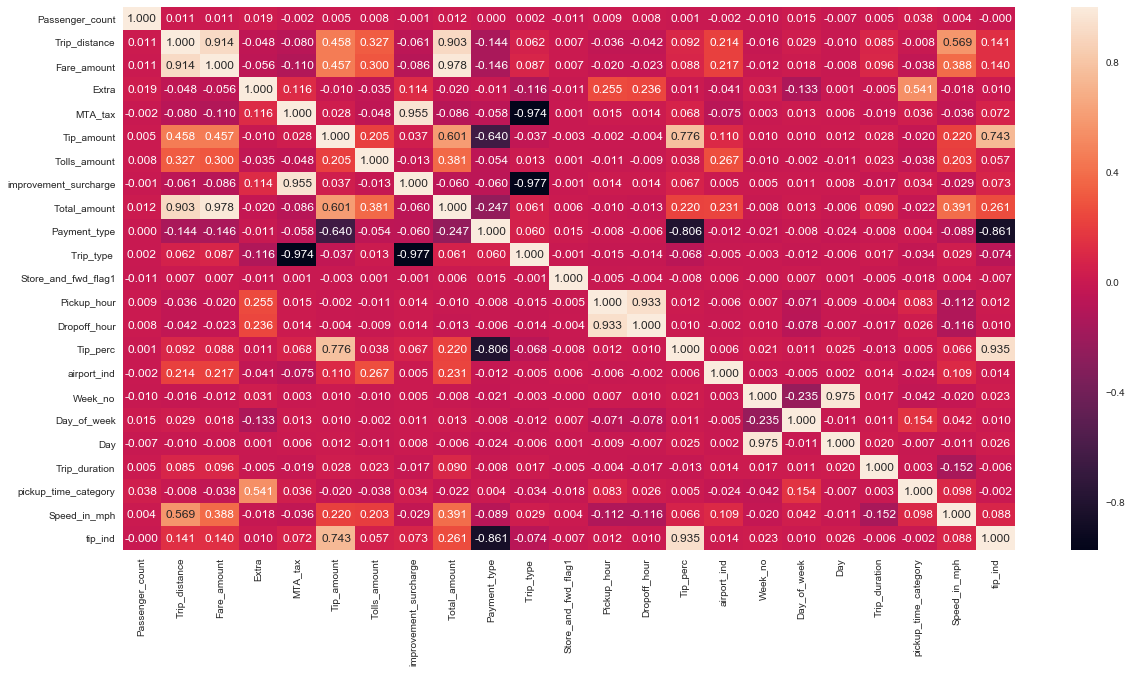

In [291]:
#Understanding feature correlation
drop_columns=['lpep_pickup_datetime','Lpep_dropoff_datetime','Pickup_longitude','Pickup_latitude','Dropoff_latitude','Dropoff_longitude','VendorID','RateCodeID']
data_df = data.drop(drop_columns, axis=1)
plt.figure(figsize=(20,10))
data_corr = data_df.corr()
sns.heatmap(data_corr,annot=True,fmt='0.3f')
plt.show()

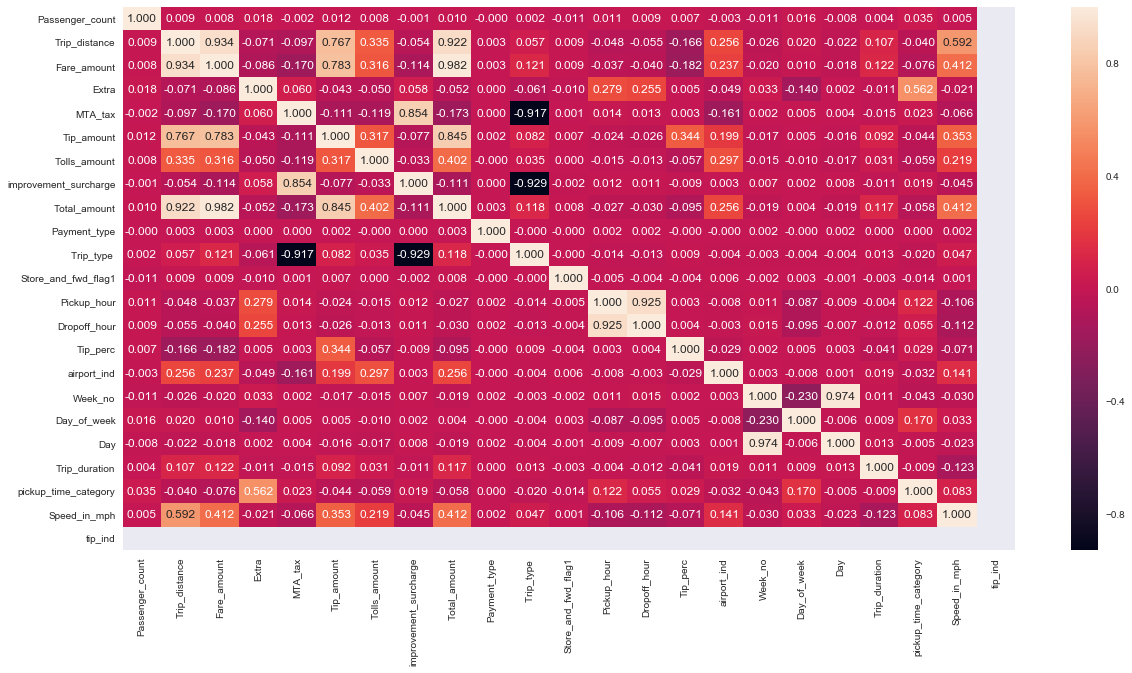

In [292]:
#feature correlation with records whose tip_amount is >0
drop_columns=['lpep_pickup_datetime','Lpep_dropoff_datetime','Pickup_longitude','Pickup_latitude','Dropoff_latitude','Dropoff_longitude','VendorID','RateCodeID']
data1 = data.drop(drop_columns, axis=1)
data1.drop(data1[data1['Tip_amount']<=0].index, inplace=True)
plt.figure(figsize=(20,10))
data_corr1 = data1.corr()
sns.heatmap(data_corr1,annot=True,fmt='0.3f')
plt.show()

In [66]:
#data1.Tip_amount.quantile(0.99)

11.67

In [293]:
data.columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'RateCodeID', 'Pickup_longitude', 'Pickup_latitude',
       'Dropoff_longitude', 'Dropoff_latitude', 'Passenger_count',
       'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax', 'Tip_amount',
       'Tolls_amount', 'improvement_surcharge', 'Total_amount', 'Payment_type',
       'Trip_type ', 'Store_and_fwd_flag1', 'Pickup_date', 'Dropoff_date',
       'Pickup_hour', 'Dropoff_hour', 'Tip_perc', 'airport_ind', 'Week_no',
       'Day_of_week', 'Day', 'Trip_duration', 'pickup_time_category',
       'Speed_in_mph', 'tip_ind'],
      dtype='object')

__Building Classification Model:__

__Preparing data for training and testing__

In [294]:
data_df=data
drop_columns=['tip_ind','Tip_amount','Tip_perc','lpep_pickup_datetime','Lpep_dropoff_datetime','Pickup_longitude','Pickup_latitude','Dropoff_latitude','Dropoff_longitude','VendorID','RateCodeID','Pickup_date','Dropoff_date']
data_df = data_df.loc[np.random.choice(data_df.index,size=900000,replace=False)]
X = data_df.drop(drop_columns, axis=1)
Y = data_df['tip_ind']
#X = StandardScaler().fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print("Shape of x_train",X_train.shape)
print("Shape of y_train",Y_train.shape)
print("Shape of x_valid",X_test.shape)
print("Shape of y_valid",Y_test.shape)

Shape of x_train (720000, 20)
Shape of y_train (720000,)
Shape of x_valid (180000, 20)
Shape of y_valid (180000,)


In [295]:
X_train.columns

Index(['Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tolls_amount', 'improvement_surcharge', 'Total_amount', 'Payment_type',
       'Trip_type ', 'Store_and_fwd_flag1', 'Pickup_hour', 'Dropoff_hour',
       'airport_ind', 'Week_no', 'Day_of_week', 'Day', 'Trip_duration',
       'pickup_time_category', 'Speed_in_mph'],
      dtype='object')

In [296]:
kfold = StratifiedKFold(n_splits=3)
random_state = 10

__Building baselines models__

      Algorithm  CrossValMeans  CrossValerrors
0  RandomForest       0.998995        0.000183
1           GBM       0.998343        0.000119
2      Logistic       0.999825        0.000005
3      LightGBM       0.999941        0.000007


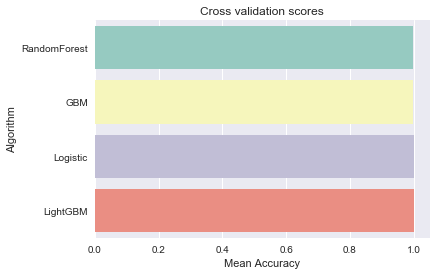

In [297]:
classifiers = []
#classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
#classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(lgb.LGBMRegressor(random_state = random_state))


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "roc_auc", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":[
"RandomForest","GBM","Logistic","LightGBM"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")
print(cv_res)

In [299]:
# Building Light GBM Classifier with n_estimators (100,150,200,250), learning_rate (0.01,0.03,0.1,0.01), max_depth (5,6,7,8)
model = lgb.LGBMRegressor(objective='binary', njobs=9, n_estimators=100, learning_rate=0.03, sub_sample=0.75, max_depth=8)
model.fit(X_train, Y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [300]:
print("Light GBM Classification Model Performance Metrics:")
print("-------------------------------")
rmse = np.sqrt(metrics.mean_squared_error(train_predictions, Y_train))
print("Train rmse:", rmse)
rmse = np.sqrt(metrics.mean_squared_error(test_predictions, Y_test))
print("Test rmse:", rmse)
mae = metrics.mean_absolute_error(test_predictions, Y_test)
evs = metrics.explained_variance_score(test_predictions, Y_test)
r2 = metrics.r2_score(test_predictions, Y_test)
f1_score = metrics.f1_score(test_predictions.round(), Y_test)
accuracy = metrics.accuracy_score(test_predictions.round(), Y_test)
print("Mean Absolute Error:", mae)
print("Explained Variance:", evs)
print("R2 Score:", r2)
print("F1 Score", f1_score)
print("Accuracy Score", accuracy)
fpr, tpr, _ = roc_curve(Y_test, test_predictions)
roc_auc = auc(fpr, tpr)
print("roc_auc:",roc_auc)
print("gini:",(roc_auc*2)-1)
print("-------------------------------")

Light GBM Classification Model Performance Metrics:
-------------------------------
Train rmse: 0.126530265593
Test rmse: 0.126004544891
Mean Absolute Error: 0.0669859395353
Explained Variance: 0.916671640357
R2 Score: 0.916671607689
F1 Score 0.979567861267
Accuracy Score 0.982994444444
roc_auc: 0.998903168842
gini: 0.997806337683
-------------------------------


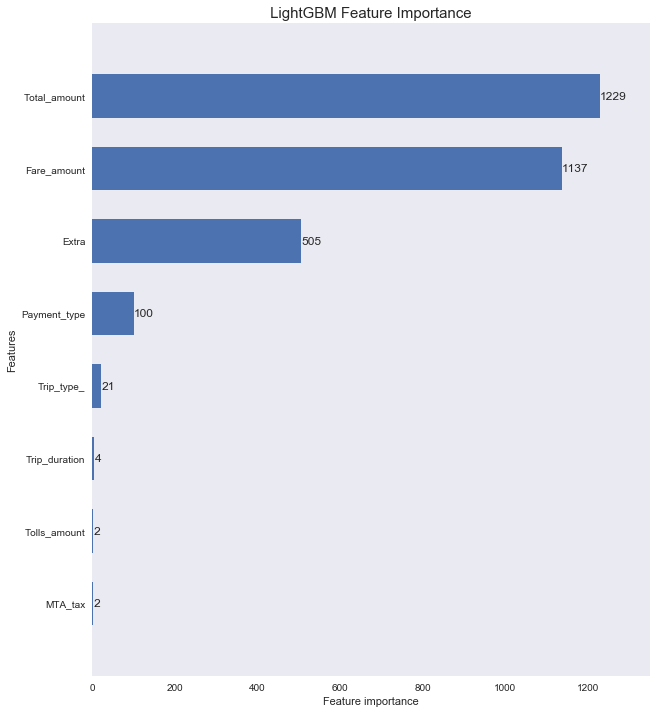

In [301]:
#ploting feature importance for classification model
fig, ax = plt.subplots(figsize=(10,12))
lgb.plot_importance(model, max_num_features=50, height=0.6, ax=ax)
ax.grid(False)
plt.title(" LightGBM Feature Importance ", fontsize=15)
plt.show()

In [302]:
test_predictions.round().sum()

76251.0

__Building Regression_Model__

In [304]:
data_reg=data.loc[data['tip_ind'] == 1] #filter transactions with tip_amount>0
#trying different combination of features for regression model
#drop_columns=['tip_ind','Tip_amount','Tip_perc','lpep_pickup_datetime','Lpep_dropoff_datetime','Pickup_longitude','Pickup_latitude','Dropoff_latitude','Dropoff_longitude','VendorID','RateCodeID','Pickup_date','Dropoff_date']
data_reg1=data_reg[['Total_amount','Trip_duration', 'Speed_in_mph','Tip_perc']]
data_reg1.data_reg1 = data_reg1.loc[np.random.choice(data_reg1.index,size=500000,replace=False)]
X = data_reg1[['Total_amount','Trip_duration', 'Speed_in_mph']]
Y = data_reg1['Tip_perc']
#X = StandardScaler().fit_transform(X)
X_train, X_test1, Y_train, Y_test1 = train_test_split(X, Y, test_size=0.2)
print("Shape of x_train",X_train.shape)
print("Shape of y_train",Y_train.shape)
print("Shape of x_valid",X_test1.shape)
print("Shape of y_valid",Y_test1.shape)

Shape of x_train (478679, 3)
Shape of y_train (478679,)
Shape of x_valid (119670, 3)
Shape of y_valid (119670,)


In [305]:
X_test2=X_test[['Total_amount','Trip_duration', 'Speed_in_mph']]

In [325]:
# Building Light GBM Regressor
model_reg = lgb.LGBMRegressor(objective=None, njobs=9, n_estimators=25, learning_rate=0.01, sub_sample=0.8, max_depth=3)
model_reg.fit(X_train, Y_train)
train_reg_predictions = model_reg.predict(X_train)
test_reg_predictions = test_predictions.round()*(model_reg.predict(X_test2))

In [326]:
test_reg_predictions

array([  0.        ,   0.        ,   0.        , ...,   0.        ,
        16.42932451,   0.        ])

In [328]:
print("Light GBM Regression Model Performance Metrics:")
print("-------------------------------")
rmse = np.sqrt(metrics.mean_squared_error(test_reg_predictions, Y_test))
print("Test rmse:", rmse)
mae = metrics.mean_absolute_error(test_reg_predictions, Y_test)
r2 = metrics.r2_score(test_reg_predictions, Y_test)
print("Mean Absolute Error:", mae)
print("R2 Score:",r2)

Light GBM Regression Model Performance Metrics:
-------------------------------
Test rmse: 9.95199079427
Mean Absolute Error: 6.47719919971
R2 Score: 0.210059881216


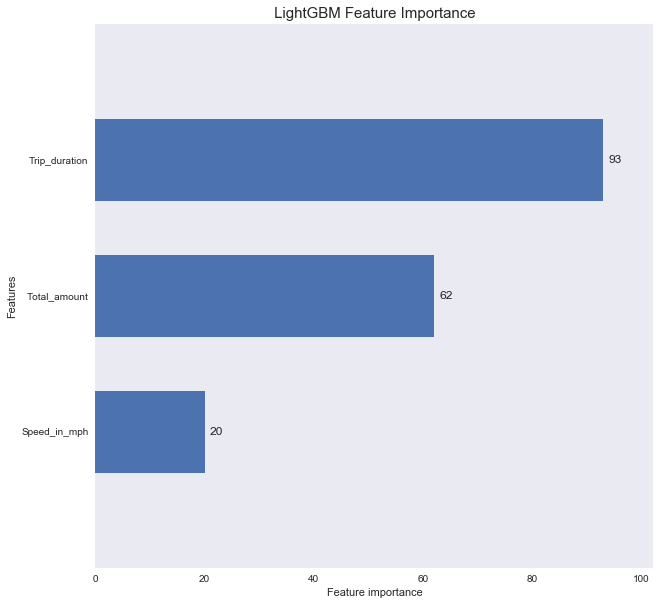

In [330]:
#ploting feature importance for regression model
fig, ax = plt.subplots(figsize=(10,10))
lgb.plot_importance(model_reg, max_num_features=50, height=0.6, ax=ax)
ax.grid(False)
plt.title(" LightGBM Feature Importance ", fontsize=15)
plt.show()

<font color=red size=3 >__Question 5-1: Build a derived variable representing the average speed over the course of a trip.__ </font>

Build the feature Speed_in_mph in the Feature Engineering step

<font color=red size=3 >__Question 5-2: Can you perform a test to determine if the average trip speeds are materially the same in all weeks of September? If you decide they are not the same, can you form a hypothesis regarding why they differ?__ </font>

In [332]:
#preparing 4 dataframes with average trip speeds in all four weeks of September 
g1=data['Speed_in_mph'].loc[np.random.choice(data.index,size=12000,replace=False)].loc[data['Week_no'] == 1].to_frame().iloc[:2000]
g2=data['Speed_in_mph'].loc[np.random.choice(data.index,size=12000,replace=False)].loc[data['Week_no'] == 2].to_frame().iloc[:2000]
g3=data['Speed_in_mph'].loc[np.random.choice(data.index,size=12000,replace=False)].loc[data['Week_no'] == 3].to_frame().iloc[:2000]
g4=data['Speed_in_mph'].loc[np.random.choice(data.index,size=12000,replace=False)].loc[data['Week_no'] == 4].to_frame().iloc[:2000]

#train.loc[np.random.choice(train.index,size=100000,replace=False)]
#print(g1.describe())
#print(g2.describe())
#print(g3.describe())
#print(g4.describe())

In [333]:
#perforning an ANOVA test to see if the average trip speeds are materially the same in all four weeks of september
from scipy import stats  
      
f_val, p_val = stats.f_oneway(g2, g2, g3,g4) 
print("Fvalue: ",f_val)
print("Pvalue: ",p_val)
#If P > 0.05, we can claim with high confidence that the means of the results of all three experiments are not significantly different.

Fvalue:  [ 4.75055568]
Pvalue:  [ 0.00259618]


Since p value is <0.05 we can claim that the difference between some of the means is statistically significant and hence average trip speeds are materially different

<font color=red size=3 >__Question 5-3: Can you build up a hypothesis of average trip speed as a function of time of day?__ </font>

In [334]:
#created a dataset with speed and pickup hour features
speed_hour=data[['Speed_in_mph','Pickup_hour']]

In [335]:
#trying to fit into a polynomial function: tested with different polynomial degrees
z = np.polyfit(list(speed_hour['Pickup_hour']), list(speed_hour['Speed_in_mph']), 3)

In [336]:
print(z)

[  2.82457429e-03  -7.56338474e-02   2.51755795e-01   1.50215534e+01]


As we see from the above result that the weight on y intercept is heavy compared to the x coefficents which means that there is no real dependency between average trip speed and time of day

Text(0,0.5,'speed_in_mph')

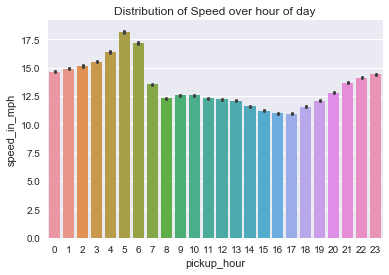

In [344]:
ax=sns.barplot(list(speed_hour['Pickup_hour']), list(speed_hour['Speed_in_mph']))
ax.set_title('Distribution of Speed over hour of day')
ax.set_xlabel('pickup_hour')
ax.set_ylabel('speed_in_mph')

From the above graph we notice that average speed is lower from 8AM-8PM and increases during rest of the hours and this is our hypothesis.<br>
<br>
Below I'm doing a t-test to see if the average trip speed is different from 8am-8pm vs rest of the hours

In [338]:
#creating a dataset to tag the groups. group 1->pickup hour between 8am to 8pm and group2-->pickup hour >8pm and less than 8am
speed_hour['group'] = data['Pickup_hour'].apply(lambda x : 1 if ((x <= 8) | (x > 20)) else 2)

In [340]:
gs1=speed_hour['Speed_in_mph'].loc[speed_hour['group'] == 1].to_frame().iloc[:1000]
#print(gs1.describe())
gs2=speed_hour['Speed_in_mph'].loc[speed_hour['group'] == 2].to_frame().iloc[:1000]
#print(gs2.describe())

In [341]:
from scipy.stats import ttest_ind, f_oneway, lognorm, levy, skew, chisquare
ttest_ind(gs1,gs2,equal_var=False) #different

Ttest_indResult(statistic=array([ 16.91610501]), pvalue=array([  9.40741223e-60]))

From the above result, since the pvalue <0.05 the two groups are different at 95% confidence interval and we reject the null hypothesis

__Thank you!__